Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

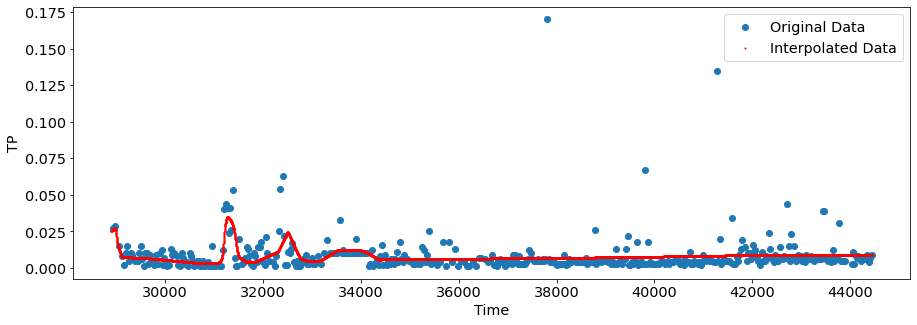

313/313 [==============================] - 0s 388us/step - loss: 1.3468e-17
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelBB14_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/BB14.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 28933.58                    
time_max = 44452.41                         

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.420999404
,0.424801238
,0.428731948
,0.432662657
,0.436593367
,0.440524077
,0.444519224
,0.448321058
,0.452251768
,0.456182477
,0.460113187
,0.464043897
,0.468039044
,0.471840878
,0.475771587
,0.479702297
,0.483633007
,0.487563716
,0.491558864
,0.495425136
,0.503286555
,0.605291691
,0.830759772
,0.928898636
,0.966143721
,0.968076856
,0.97007443
])
interpolation

array([[0.03045306],
       [0.03053873],
       [0.03062729],
       [0.03071586],
       [0.03080443],
       [0.03089299],
       [0.03098301],
       [0.03106868],
       [0.03115724],
       [0.03124581],
       [0.03133437],
       [0.03142294],
       [0.03151296],
       [0.03159862],
       [0.03168719],
       [0.03177576],
       [0.03186432],
       [0.03195289],
       [0.03204291],
       [0.03213002],
       [0.03234502],
       [0.03534731],
       [0.04551325],
       [0.04715901],
       [0.04761937],
       [0.04764326],
       [0.04766795]], dtype=float32)